In [1]:
# to avoid sklearn warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy
import pandas
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# the dataset is too larage please download from 'https://www.kaggle.com/wendykan/lending-club-loan-data'
DF = pandas.read_csv('../loan.csv')
# drop entire null columns
DF = DF.dropna(axis=1,how='all')
# remove '<' & '>' sign
DF['emp_length'] = DF['emp_length'].str.strip('<')
DF['emp_length'] = DF['emp_length'].str.strip('>').astype(str)
DF.head(5)

C:\Users\Wade\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [3]:
DF.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


## Choose the needed columns

欄位           | 類別
--------------|------------------
id            |       feature
member_id      |        feature
loan_amnt       |       feature
funded_amnt      |      feature
int_rate          |     feature
installment        |    feature
grade               |   -
sub_grade            |  label
term                  | feature
home_ownership         |feature
loan_status            |feature
purpose                |feature
verification_status    |feature
addr_state             |feature
zip_code               |feature

In [2]:
# Select the columns we need
column_needed = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'term', 'home_ownership', 'loan_status', 'purpose', 'verification_status', 'addr_state', 'zip_code', 'emp_length', 'annual_inc']
LoanDF = DF[column_needed].copy()

# 2. Data cleaning

In [5]:
# check if value is missing
LoanDF.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
int_rate               0
installment            0
grade                  0
sub_grade              0
term                   0
home_ownership         0
loan_status            0
purpose                0
verification_status    0
addr_state             0
zip_code               0
dtype: int64

In [6]:
# count how many rows
LoanDF.count()

id                     887379
member_id              887379
loan_amnt              887379
funded_amnt            887379
int_rate               887379
installment            887379
grade                  887379
sub_grade              887379
term                   887379
home_ownership         887379
loan_status            887379
purpose                887379
verification_status    887379
addr_state             887379
zip_code               887379
dtype: int64

## Show distributuion with histogram

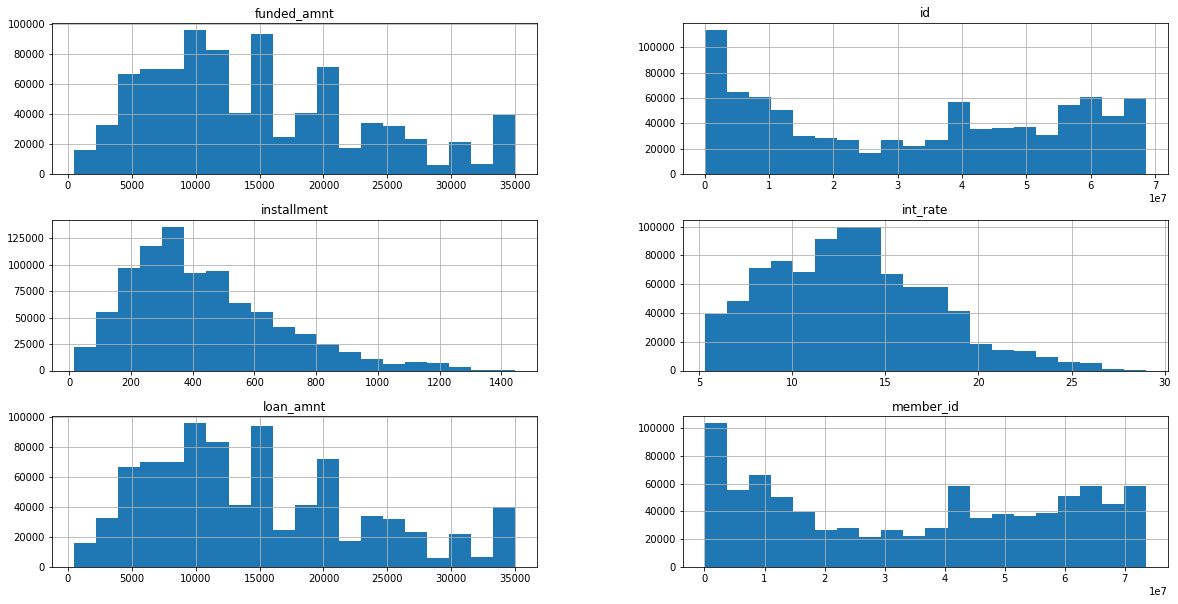

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
LoanDF.hist(figsize=(20,10), bins=20) # bins為長條組數, total 20 groups
plt.show() # 1e7 means 1*10^7

## Correlation and heatmap

In [8]:
LoanDF.corr()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment
id,1.000000,0.999443,0.063803,0.066058,-0.142963,0.025347
member_id,0.999443,1.000000,0.064461,0.066754,-0.142205,0.026036
loan_amnt,0.063803,0.064461,1.000000,0.999263,0.145023,0.944977
funded_amnt,0.066058,0.066754,0.999263,1.000000,0.145160,0.946005
int_rate,-0.142963,-0.142205,0.145023,0.145160,1.000000,0.133075
installment,0.025347,0.026036,0.944977,0.946005,0.133075,1.000000


#### 呈現屬性間的相關度

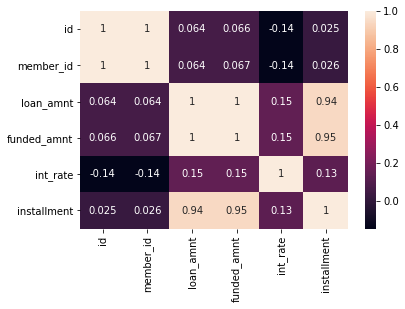

In [10]:
import seaborn as sns
loan_corr = LoanDF.corr()
sns.heatmap(loan_corr, xticklabels = loan_corr.columns, yticklabels = loan_corr.columns, annot=True)

#### 風險評等分布

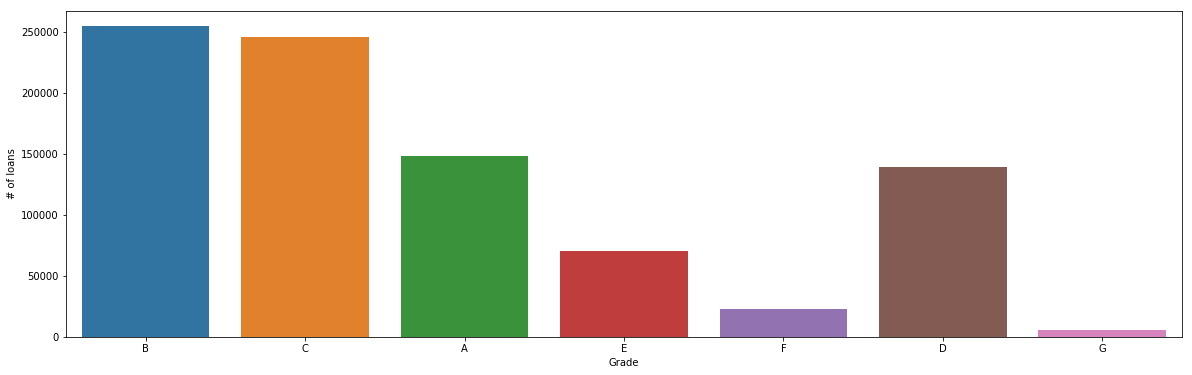

In [10]:
# Improve readability
fig,ax = plt.subplots(figsize=(20,6))
# Display a categorial histogram and label axes
sns.countplot(x='grade', data=LoanDF, ax=ax)
ax.set(xlabel='Grade', ylabel= '# of loans')
plt.show();

#### 借款理由以'債務合併/重組'為大宗

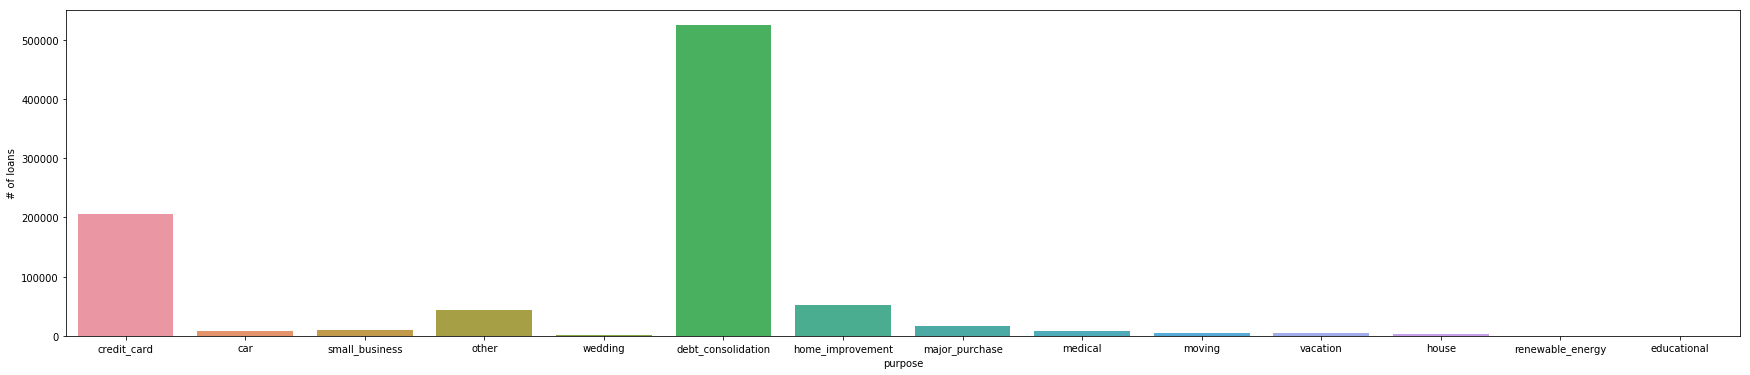

In [13]:
fig,ax = plt.subplots(figsize=(30,6))
sns.countplot(x='purpose', data=LoanDF, ax=ax)
ax.set(xlabel='purpose', ylabel= '# of loans')
plt.show();

#### 房屋所有權

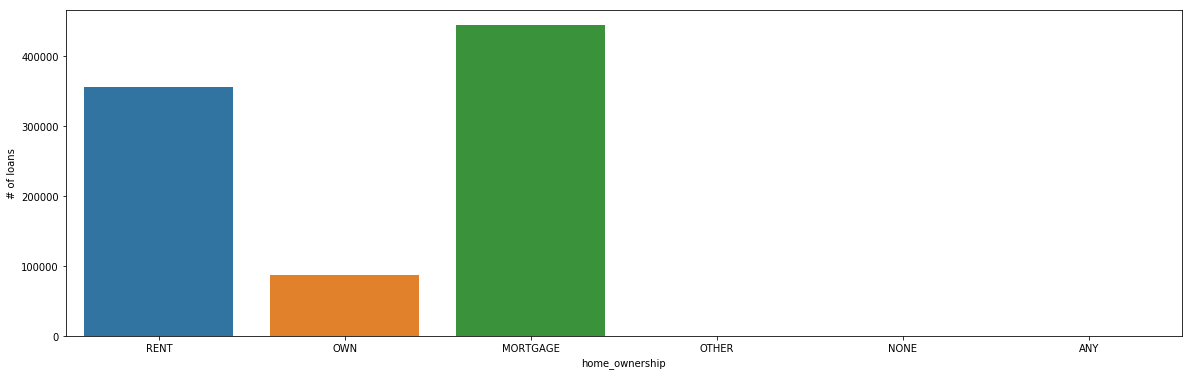

In [14]:
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x='home_ownership', data=LoanDF, ax=ax)
ax.set(xlabel='home_ownership', ylabel= '# of loans')
plt.show();

#### 還款期限只限兩種

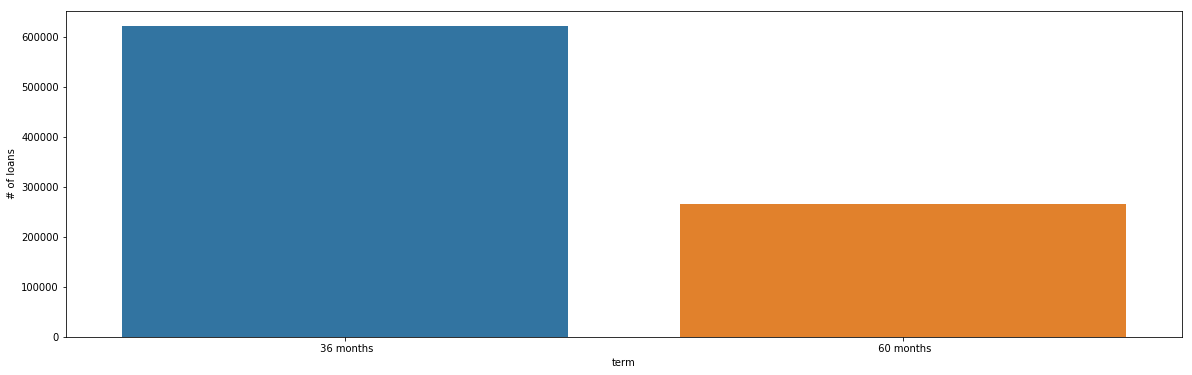

In [15]:
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x='term', data=LoanDF, ax=ax)
ax.set(xlabel='term', ylabel= '# of loans')
plt.show();

#### 之前的借款紀錄

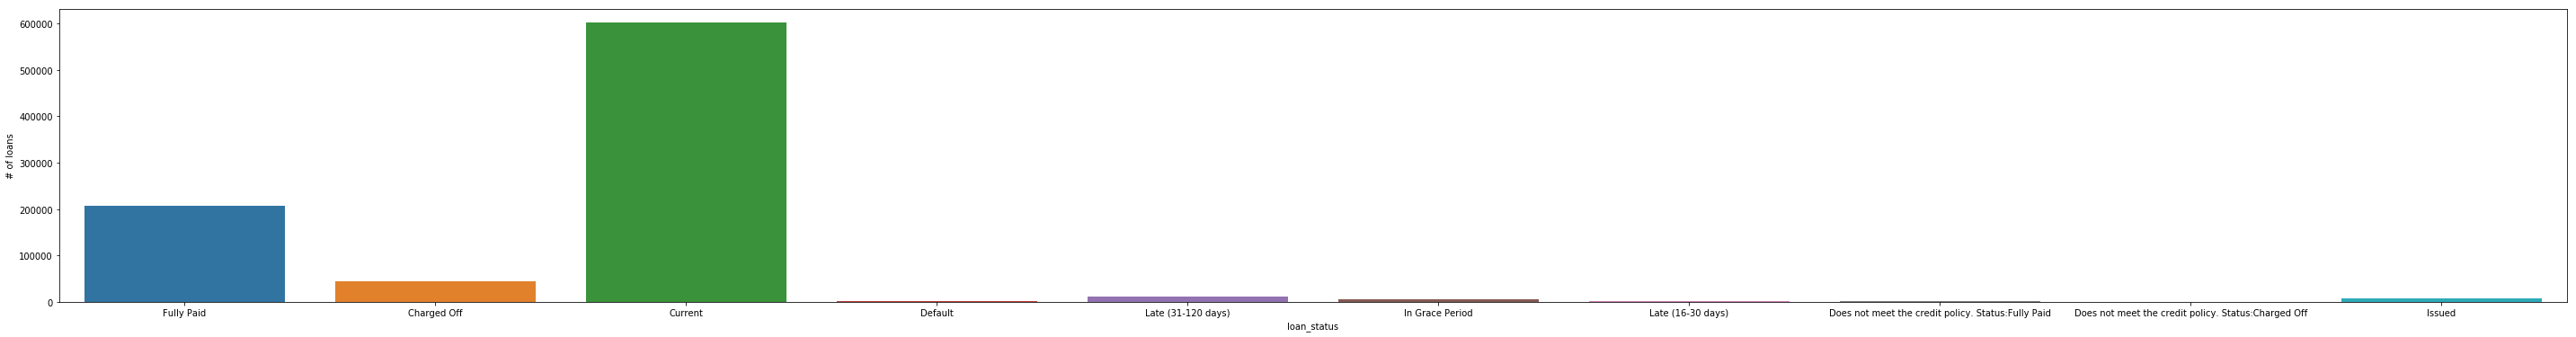

In [18]:
fig,ax = plt.subplots(figsize=(50,6))
sns.countplot(x='loan_status', data=LoanDF, ax=ax)
ax.set(xlabel='loan_status', ylabel= '# of loans')
plt.show();

#### 驗證借款紀錄是否屬實

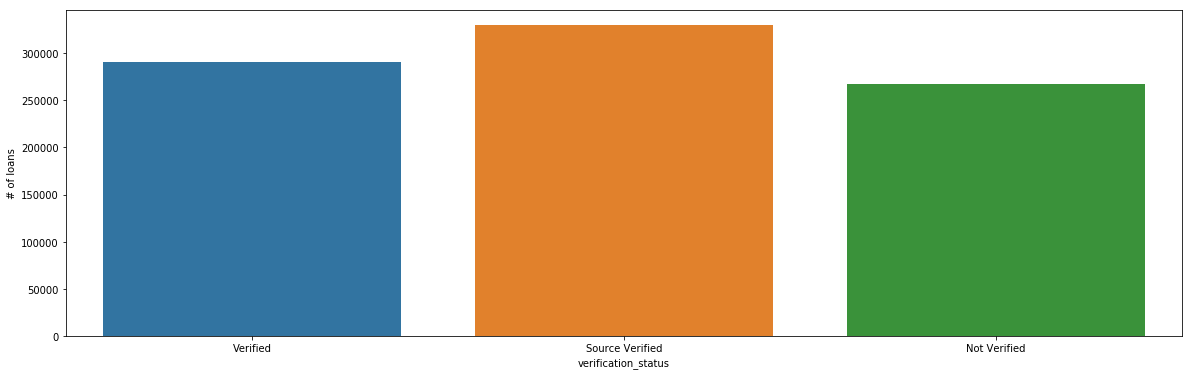

In [20]:
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x='verification_status', data=LoanDF, ax=ax)
ax.set(xlabel='verification_status', ylabel= '# of loans')
plt.show();

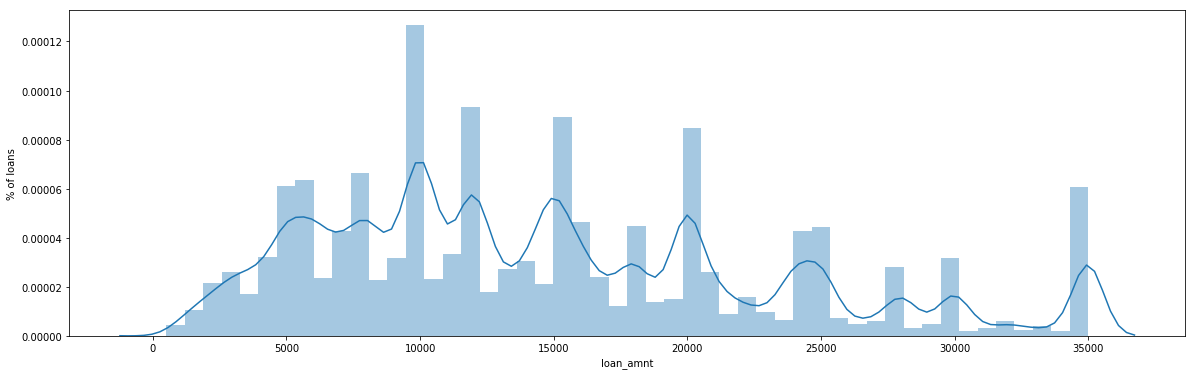

In [29]:
fig,ax = plt.subplots(figsize=(20,6))
sns.distplot(LoanDF['loan_amnt'])
ax.set(xlabel='loan_amnt', ylabel= '% of loans')
plt.show();

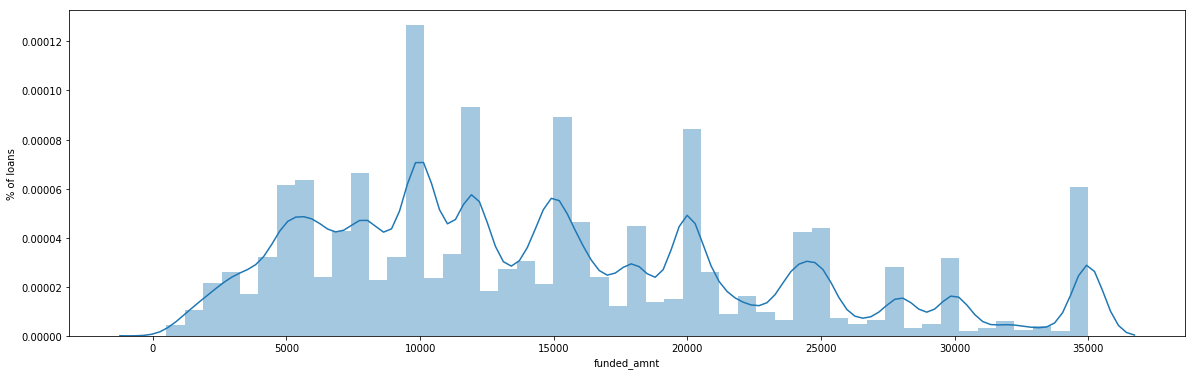

In [30]:
fig,ax = plt.subplots(figsize=(20,6))
sns.distplot(LoanDF['funded_amnt'])
ax.set(xlabel='funded_amnt', ylabel= '% of loans')
plt.show();

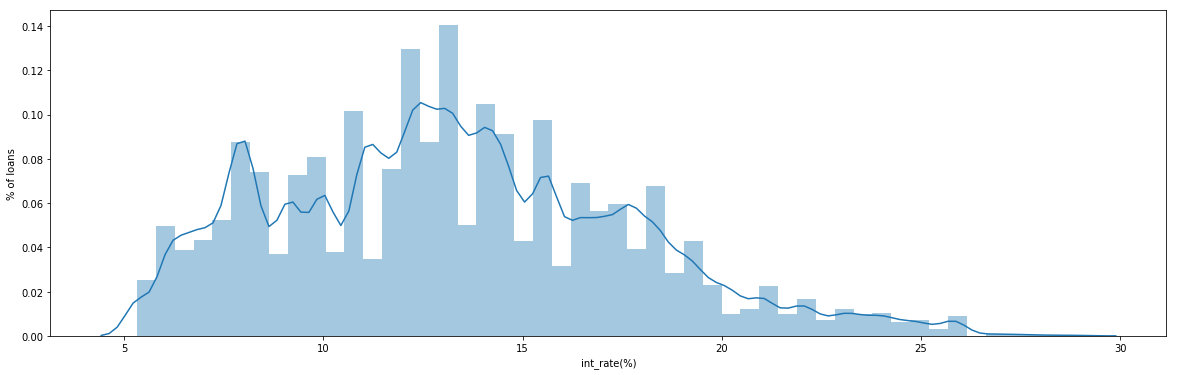

In [32]:
fig,ax = plt.subplots(figsize=(20,6))
sns.distplot(LoanDF['int_rate'])
ax.set(xlabel='int_rate(%)', ylabel= '% of loans')
plt.show();

In [11]:
# 先將sub_grade依照A1, A2等等排序
# 比免底下圖片x順序很奇怪
Loan_order = LoanDF.sort_values(by='sub_grade')

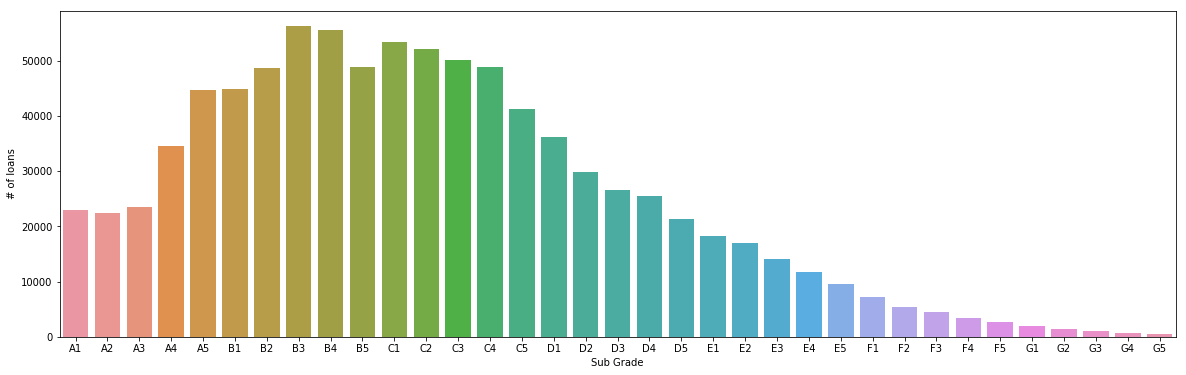

In [12]:
fig,ax = plt.subplots(figsize=(20,6))
# Display a categorial histogram and label axes
sns.countplot(x='sub_grade', data=Loan_order, ax=ax)
ax.set(xlabel='Sub Grade', ylabel= '# of loans')
plt.show();

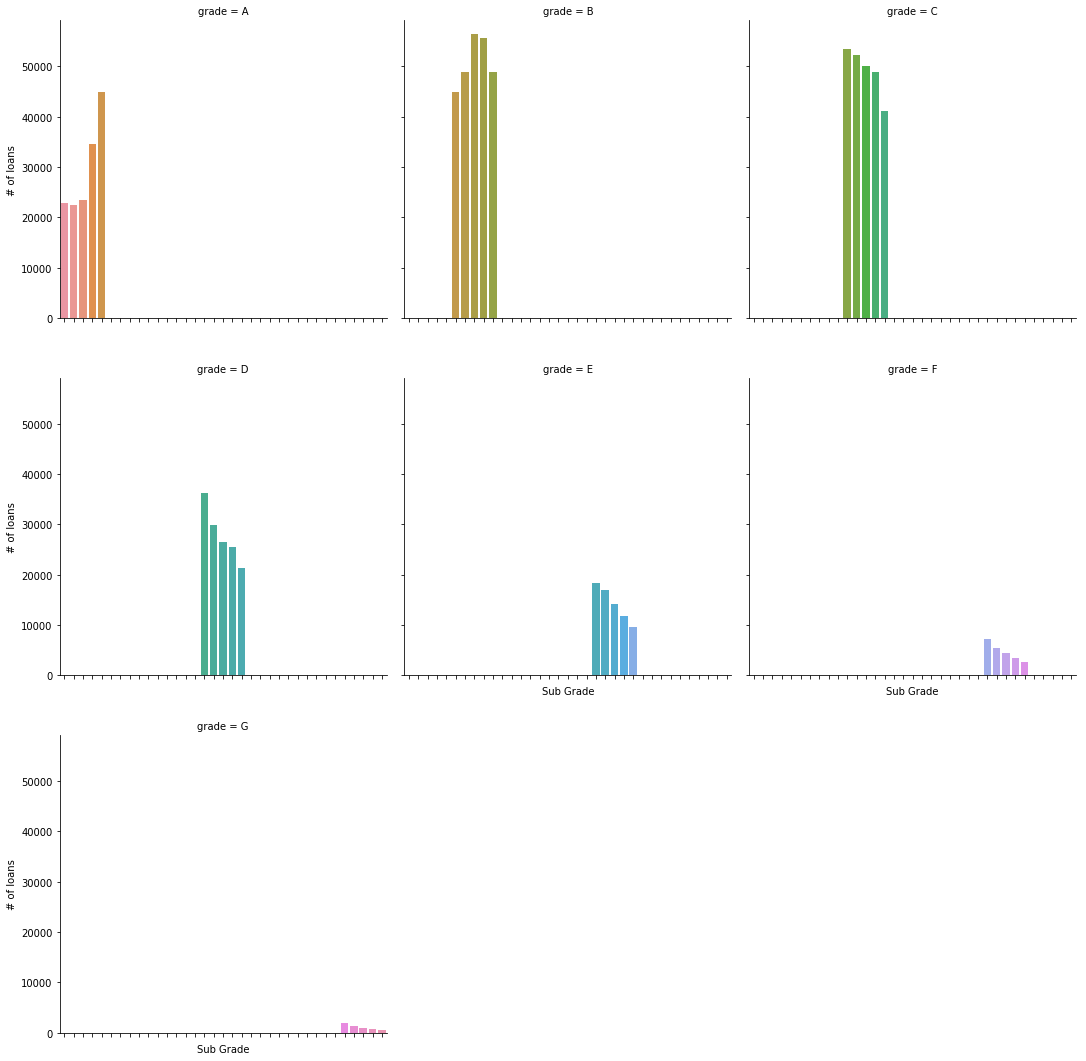

In [13]:
# set_xticklabels([]) 用於隱藏每張小圖下方的 xlabel
sns.catplot(x='sub_grade', data=Loan_order, col='grade', kind='count', col_wrap=3).set_axis_labels('Sub Grade', '# of loans').set_xticklabels([]);
# 設定上下sub plot的間距
plt.subplots_adjust(hspace = 0.2)

#### 可以看出80多萬筆資料內的grade分布

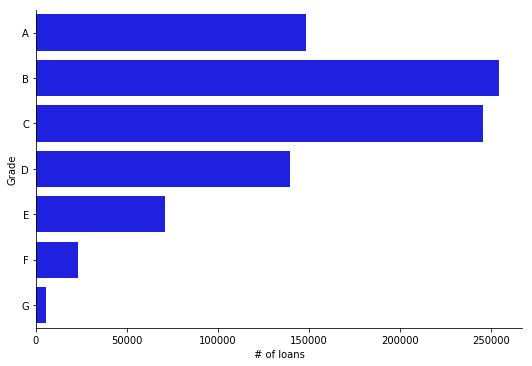

In [14]:
sns.catplot(y='grade', data=Loan_order, kind='count',
               aspect=1.5, height=5, color='blue').set_axis_labels('# of loans', 'Grade');

#### 依照個數來排序各風險階級的分布

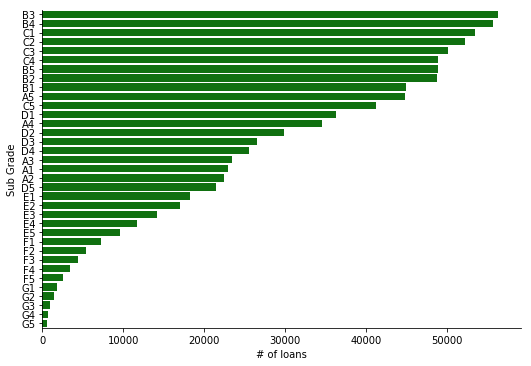

In [15]:
sns.catplot(y='sub_grade', data=Loan_order, kind='count',
               order=Loan_order['sub_grade'].value_counts().index, 
               aspect=1.5, height=5, color='green').set_axis_labels('# of loans', 'Sub Grade');

# 3. Feature Engineering

#### 將type為object的進行feature casting

In [3]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 17 columns):
id                     887379 non-null int64
member_id              887379 non-null int64
loan_amnt              887379 non-null float64
funded_amnt            887379 non-null float64
int_rate               887379 non-null float64
installment            887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
term                   887379 non-null object
home_ownership         887379 non-null object
loan_status            887379 non-null object
purpose                887379 non-null object
verification_status    887379 non-null object
addr_state             887379 non-null object
zip_code               887379 non-null object
emp_length             887379 non-null object
annual_inc             887375 non-null float64
dtypes: float64(5), int64(2), object(10)
memory usage: 115.1+ MB


In [3]:
def encode_features(df):
    features = ['term', 'home_ownership', 'loan_status', 'purpose', 'verification_status', 'emp_length'] # 缺emp_length
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature]) # Transform Categories Into Integers
        one_hot = preprocessing.OneHotEncoder()
        feature_array = one_hot.fit_transform(df[[feature]]).toarray()
        feature_labels = list(le.classes_)
        one_hot_features = pandas.DataFrame(feature_array, columns=feature_labels)
        df = pandas.concat([df, one_hot_features], axis=1)
    return df


# todo: drop舊的(concat前的)

# feature
X = encode_features(LoanDF)
# 移除label
X = X.drop('grade', axis=1)
X = X.drop('sub_grade', axis=1)
X = X.drop('int_rate', axis=1)
X = X.drop('id', axis=1)
X = X.drop('member_id', axis=1)
X = X.drop('funded_amnt', axis=1)
X = X.drop('addr_state', axis=1)
X = X.drop('zip_code', axis=1)

print(X.shape)
print(X.head(3))

C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Wade\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

(887379, 56)
   loan_amnt  installment  term  home_ownership  loan_status  purpose  \
0     5000.0       162.87     0               5            5        1   
1     2500.0        59.83     1               5            0        0   
2     2400.0        84.33     0               5            5       11   

   verification_status  emp_length  annual_inc   36 months ...   10+ years  \
0                    2           2     24000.0         1.0 ...         1.0   
1                    1           0     30000.0         0.0 ...         0.0   
2                    0           2     12252.0         1.0 ...         1.0   

   2 years  3 years  4 years  5 years  6 years  7 years  8 years  9 years  nan  
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  0.0  
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  0.0  
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  0.0  

[3 rows x 56 columns]


In [4]:
# Y (label)的sub_grade進行encoding
Y = LoanDF[['sub_grade']]
Y = pandas.get_dummies(data=Y, columns=['sub_grade'])
Y.head(5)

,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 4. Models

### Keras MLP

In [5]:
# dataframe to nd array
X = X.values
Y = Y.values

In [6]:
# 標準化
minMaxScale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = minMaxScale.fit_transform(X)

In [7]:
# 將資料分成訓練組及測試組
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
# 建立模型
model = Sequential()
model.add(Dense(56, input_dim=56, kernel_initializer='uniform', activation='relu'))
model.add(Dense(35, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10, batch_size=5000, verbose=2)

Using TensorFlow backend.


Train on 559048 samples, validate on 62117 samples
Epoch 1/10
 - 2s - loss: 0.6572 - acc: 0.9571 - val_loss: 0.6420 - val_acc: 0.9714
Epoch 2/10
 - 1s - loss: 0.6185 - acc: 0.9714 - val_loss: 0.5953 - val_acc: 0.9714
Epoch 3/10
 - 1s - loss: 0.5740 - acc: 0.9714 - val_loss: 0.5529 - val_acc: 0.9714
Epoch 4/10
 - 1s - loss: 0.5336 - acc: 0.9714 - val_loss: 0.5145 - val_acc: 0.9714
Epoch 5/10
 - 1s - loss: 0.4969 - acc: 0.9714 - val_loss: 0.4796 - val_acc: 0.9714
Epoch 6/10
 - 1s - loss: 0.4637 - acc: 0.9714 - val_loss: 0.4480 - val_acc: 0.9714
Epoch 7/10
 - 1s - loss: 0.4336 - acc: 0.9714 - val_loss: 0.4193 - val_acc: 0.9714
Epoch 8/10
 - 1s - loss: 0.4062 - acc: 0.9714 - val_loss: 0.3933 - val_acc: 0.9714
Epoch 9/10
 - 1s - loss: 0.3814 - acc: 0.9714 - val_loss: 0.3697 - val_acc: 0.9714
Epoch 10/10
 - 1s - loss: 0.3589 - acc: 0.9714 - val_loss: 0.3482 - val_acc: 0.9714


In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

NameError: name 'plt' is not defined

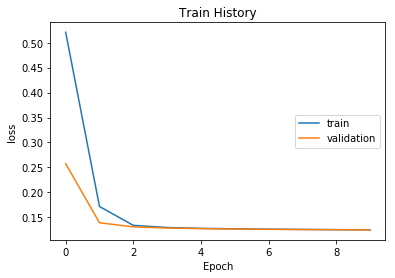

In [25]:
show_train_history(train_history, 'loss', 'val_loss')

In [13]:
scores = model.evaluate(x=X_test, y=y_test)
scores[1]

266214/266214 [==============================] - 5s 20us/step


0.9714285731315613

In [29]:
# 存模型
def save_model(model):
    json_model = model.to_json()
    open('model_architecture.json', 'w').write(json_model)
    # saving weights
    model.save_weights('model_weights.h5', overwrite=True)
    
# 讀模型
def load_model():
    model = model_from_json(open('model_architecture.json').read())
    model.load_weights('model_weights.h5')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
# call save_model
save_model(model)

In [ ]:
# call load model
loaded_model = load_model()

# 5. Predict

In [28]:
# 用訓練的標準化
# 測試label encode會不會與訓練的相同  or 將舊資料與新資料結合，重新跑一次encoding
# inverse label get dummy (prediction)結果